In [ ]:
'''
收益率：代表股票在一天交易中的價值變化百分比
累計超額收益率：每隻股票在形成期內月超額收益率的簡單加總
夏普指數：(平均年化報酬率-無風險利率)/年化標準差
'''

In [21]:
import numpy as np
import pandas as pd
import pandas_datareader as pdr
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime as datetime
#抓取股票資料
start = datetime.datetime(2010,5,1)
df_2330 = pdr.DataReader('2330.TW', 'yahoo', start=start)
df_2454 = pdr.DataReader('2454.TW', 'yahoo', start=start)
df_2603 = pdr.DataReader('2603.TW', 'yahoo', start=start)
df_2379 = pdr.DataReader('2379.TW', 'yahoo', start=start)
#收盤價和第一天的收盤價的比較
for stock in [df_2330, df_2454, df_2603, df_2379]:
    stock['normalized_price']=stock['Adj Close']/stock['Adj Close'].iloc[0]

df_2330.head()

,High,Low,Open,Close,Volume,Adj Close,normalized_price
Date,,,,,,,
2010-05-03,62.599998,61.400002,62.599998,61.599998,22418000.0,41.438339,1.000000
2010-05-04,62.000000,60.799999,61.900002,61.000000,38039000.0,41.034729,0.990260
2010-05-05,60.200001,59.799999,59.900002,59.799999,93944000.0,40.227482,0.970779
2010-05-06,59.900002,59.200001,59.799999,59.500000,48824000.0,40.025669,0.965909
2010-05-07,60.099998,58.500000,58.599998,59.400002,61514000.0,39.958405,0.964286


In [23]:

for stock, weight in zip([df_2330, df_2454, df_2603, df_2379],[0.3, 0.2, 0.25, 0.25]):
    stock['weighted daily return']=stock['normalized_price']*weight

    df_2603.head()

In [4]:

df_total=pd.concat([df_2330['weighted daily return'], df_2454['weighted daily return'], df_2603['weighted daily return'], df_2379['weighted daily return']],axis=1)
df_total.columns=['2330', '2454', '2603', '2379']

df_total.head()

,2330,2454,2603,2379
Date,,,,
2020-05-04,0.300000,0.200000,0.250000,0.250000
2020-05-05,0.300508,0.201001,0.247674,0.250000
2020-05-06,0.301017,0.204255,0.245349,0.251550
2020-05-07,0.302542,0.205757,0.246512,0.257748
2020-05-08,0.302542,0.206007,0.245349,0.258781


In [5]:
#總收益
df_total_money = df_total* 100000
df_total_money['Total Pos']=df_total_money.sum(axis=1)
df_total_money.head()

,2330,2454,2603,2379,Total Pos
Date,,,,,
2020-05-04,30000.000000,20000.000000,25000.000000,25000.000000,100000.000000
2020-05-05,30050.848383,20100.124193,24767.440973,25000.000000,99918.413549
2020-05-06,30101.693592,20425.531319,24534.884164,25154.957792,100217.066868
2020-05-07,30254.232393,20575.718386,24651.163678,25774.793831,101255.908288
2020-05-08,30254.232393,20600.749823,24534.884164,25878.099026,101267.965406


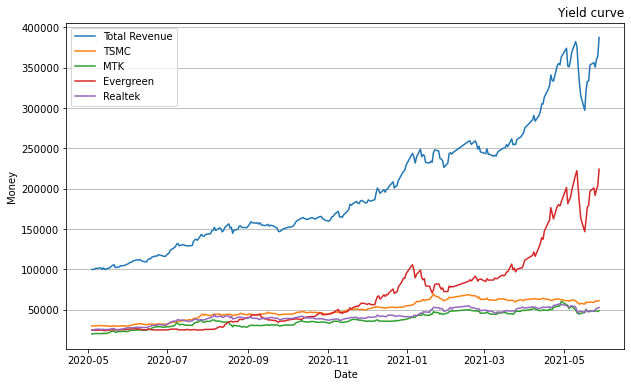

In [20]:
#總收益曲線表
fig = plt.figure(figsize=(10, 6))
plt.plot(df_total_money['Total Pos'], '-' , label="Total Revenue")
plt.plot(df_total_money['2330'], '-' , label="TSMC")
plt.plot(df_total_money['2454'], '-' , label="MTK")
plt.plot(df_total_money['2603'], '-' , label="Evergreen")
plt.plot(df_total_money['2379'], '-' , label="Realtek")
plt.title('Yield curve',loc='right')

plt.xlabel('Date')
plt.ylabel('Money')
plt.grid(True, axis='y')
plt.legend()

In [18]:
#日收益率
df_total_money['daily return']=df_total_money['Total Pos'].pct_change()
df_total_money['daily return'].head()
#累積收益率
print("累積收益率：",df_total_money['Total Pos'].iloc[-1]/df_total_money['Total Pos'].iloc[0]-1)
#平均收益率
print("平均收益率：",df_total_money['daily return'].mean())
#收益率標準差
print("收益率標準差：",df_total_money['daily return'].std())
#夏普指數(每增加1%的風險可換來__%的收益)
SR=df_total_money['daily return'].mean()/df_total_money['daily return'].std()
print("夏普指數:",SR)
ASR=np.sqrt(252)*SR
print("夏普值:",ASR)

累積收益率： 2.874034671900047
平均收益率： 0.0054364342776260085
收益率標準差： 0.021706318583966357
夏普指數: 0.25045399829530274
夏普值: 3.975833966106996


C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


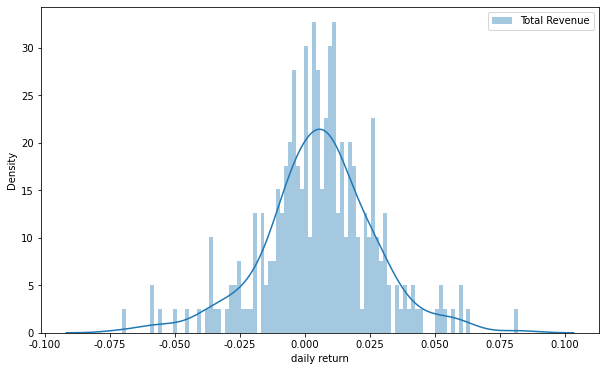

In [13]:
#用密度圖顯示日收益率
plt.rcParams['axes.unicode_minus']=False
fig = plt.figure(figsize=(10, 6))
sns.distplot(df_total_money['daily return'].dropna(),bins=100, label="Total Revenue")
plt.legend()